# Data Visualization of 911 Emergency Calls of Maryland

#### For this project, we will be analysing 911 Calls Data of Maryland, US from Kaggle. This data cotains the following fields:
1. lat : String variable, Latitude
2. lng: String variable, Longitude
3. desc: String variable, Description of the Emergency Call
4. zip: String variable, Zipcode
5. title: String variable, Title
6. timeStamp: String variable, YYYY-MM-DD HH:MM:SS
7. twp: String variable, Township
8. addr: String variable, Address
9. e: String variable, Dummy variable (always 1)

##### At the end of this notebook, we will provide a conclusion of our study.

### Import Numpy, Pandas, Matplotlib and Seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

### Read the csv file as a dataframe named df

In [2]:
df = pd.read_csv('911.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628737 entries, 0 to 628736
Data columns (total 9 columns):
lat          628737 non-null float64
lng          628737 non-null float64
desc         628737 non-null object
zip          552155 non-null float64
title        628737 non-null object
timeStamp    628737 non-null object
twp          628468 non-null object
addr         628737 non-null object
e            628737 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 43.2+ MB


In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### Zip Codes with Maximum and Minimum Number of Emergencies

#### Maximum Emergencies

In [5]:
df['zip'].value_counts().head(5)

19401.0    42861
19464.0    41386
19403.0    32931
19446.0    30510
19406.0    21345
Name: zip, dtype: int64

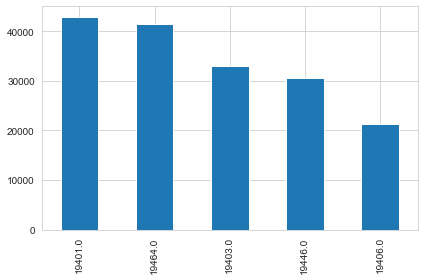

In [6]:
df['zip'].value_counts().head(5).plot.bar()
plt.tight_layout()

#### Minimum Emergencies

In [7]:
df['zip'].value_counts().tail(5)

19456.0    1
19457.0    1
18080.0    1
19543.0    1
8077.0     1
Name: zip, dtype: int64

#### We can see there are many Zip Codes having Emergency Count as 1. Let us find how many Zip Codes have Minimum Emergencies i.e. 1

In [8]:
sum(df['zip'].value_counts() == 1)

49

### Analysis: Thus, we conclude that the Zip Code: 19401.0 has the Maximum Number of Emergencies & there are 49 Zip Codes which have Minimum Number of Emergencies (i.e. 1)

### Towns with Maximum & Minimum Number of Emergencies

#### Maximum Emergencies

In [9]:
df['twp'].value_counts().head(5)

LOWER MERION    52896
ABINGTON        37887
NORRISTOWN      35311
UPPER MERION    34363
CHELTENHAM      28997
Name: twp, dtype: int64

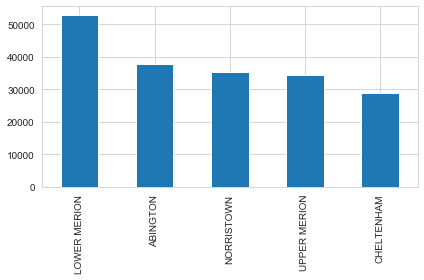

In [10]:
df['twp'].value_counts().head(5).plot.bar()
plt.tight_layout()

#### Minimum Emergencies

In [11]:
df['twp'].value_counts().tail(5)

EAST GREENVILLE    1245
BRYN ATHYN         1182
GREEN LANE          374
PHILA COUNTY        252
LEHIGH COUNTY       172
Name: twp, dtype: int64

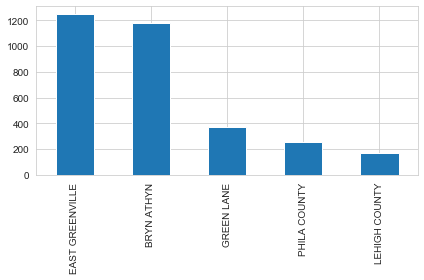

In [12]:
df['twp'].value_counts().tail(5).plot.bar()
plt.tight_layout()

### Analysis: Thus, we conclude that Lower Merion and Lehigh County are the Maximum and Minimum Emergency Prone Towns respectively.

### Types of Emergencies & Most Significant Emergencies 

In [13]:
df['title'].nunique()

147

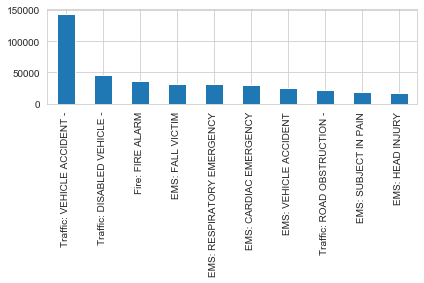

In [14]:
df['title'].value_counts().head(10).plot.bar()
plt.tight_layout()

### Analysis: We conclude that the state of Maryland has 147 Distinct Types of Emergencies, most prominent being Vehicle Accidents.

### There are 3 major categories of Emergencies namely Traffic, Fire and EMS (as specified in the column 'title')
#### We will classify all the Emergencies into these 3 categories by adding a new column namd 'Reason'
##### For Example: If the value of the column 'title' is 'Traffic: Vehicle Accident', the value of the new column 'Reason' would be 'Traffic'

In [15]:
def reason(x):
    y = x.split(':')
    return y[0]
df['Reason'] = df['title'].apply(reason)

In [16]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


### Most Common Reasons for a 911 Call

In [17]:
df['Reason'].value_counts()

EMS        313625
Traffic    220937
Fire        94175
Name: Reason, dtype: int64

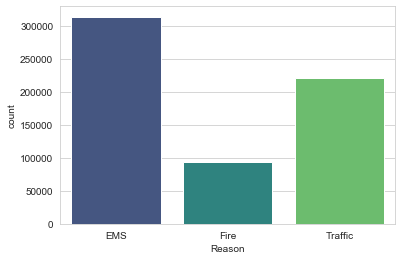

In [18]:
sns.countplot(x='Reason', data=df, palette='viridis')

### Analysis: Even though, Vehicle Accidents (Traffic Emergency) has the most number of occurences, in a broader scope Emergency Medical Services (EMS) domintaes Traffic Emergency.

### By Default, the datatype of the column 'timeStamp' is 'str'. Convert it to Date Time Object.

In [19]:
type(df['timeStamp'].iloc[0])       #By Default: 'str'

str

In [20]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [21]:
type(df['timeStamp'].iloc[0])       #Now: 'DateTime Object'

pandas._libs.tslibs.timestamps.Timestamp

### Grab attributes like Month, Day of Week and Hour from DateTime Object and store it in new columns: 

In [22]:
def hour(x):
    return x.hour
def month(x):
    return x.month
def dayofweek(x):
    return x.dayofweek
df['Hour'] = df['timeStamp'].apply(hour)
df['Month'] = df['timeStamp'].apply(month)
df['Day of Week'] = df['timeStamp'].apply(dayofweek)

In [23]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


### We notice that the Days of Week are expressed in Numerical Form. Lets change it to actual string names

In [24]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu


### Count the occurences of Emergencies on each day with a hue based on 'Reason'

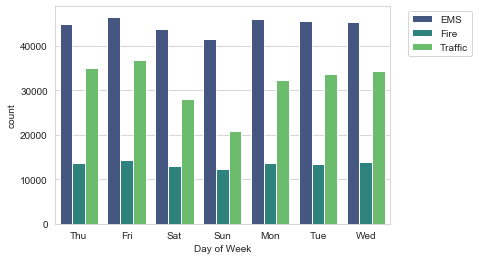

In [25]:
sns.countplot(x='Day of Week', data=df, hue='Reason', palette='viridis')
plt.legend(loc='upper center', bbox_to_anchor=(1.15, 1.0),ncol=1)

### Analysis: We see that the Fire and Medical Emergencies have almost same occurences everyday. Hence the Hospitals and Fire Stations of Maryland will be busy throughout the year. Whereas, Traffic Emergencies are comparatively less on Sunday. Hence it can be concluded that most of the people of Maryland are inactive on a Sunday.

### Count the occurences of Emergencies in each month with a hue based on 'Reason'

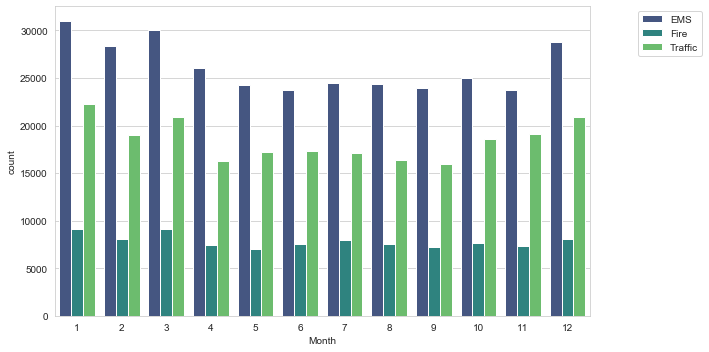

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x='Month', data=df, hue='Reason', palette='viridis')
plt.legend(loc='upper center', bbox_to_anchor=(1.15, 1.0),ncol=1)
plt.tight_layout()

### Analysis: We see that the Emergencies over the months are Evenly Distributed, with not much variation. Let us see if we can visualize anything from total of all types of Emergencies over the months.

#### Group the Data on the basis of Months

In [27]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,49730,49730,49730,43750,49730,49730,49716,49730,49730,49730,49730,49730
5,48467,48467,48467,42257,48467,48467,48443,48467,48467,48467,48467,48467


#### We see that some rows have different values for each column. This happens due to lack of certain information
#### Hence we will consider the maximum value of each row while representing data graphically.

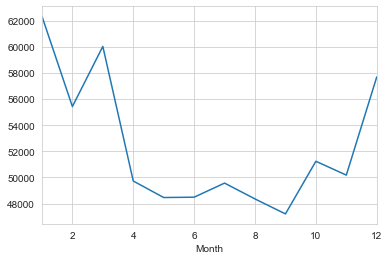

In [28]:
byMonth.max(axis=1).plot()

### Analysis: Now, we can see that the Number of Emergencies are quite less in mid year.

### Distribution on the basis of Date

#### Create a new column 'Date' and store the Date obtained from the DateTime Object created earlier. Then Group the data on the basis of 'Date'

In [29]:
def date(x):
    return x.date()
df['Date'] = df['timeStamp'].apply(date)
byDate = df.groupby('Date').count()
byDate.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444


#### As mentioned above, we will use the maximum value of each row while representing data graphically

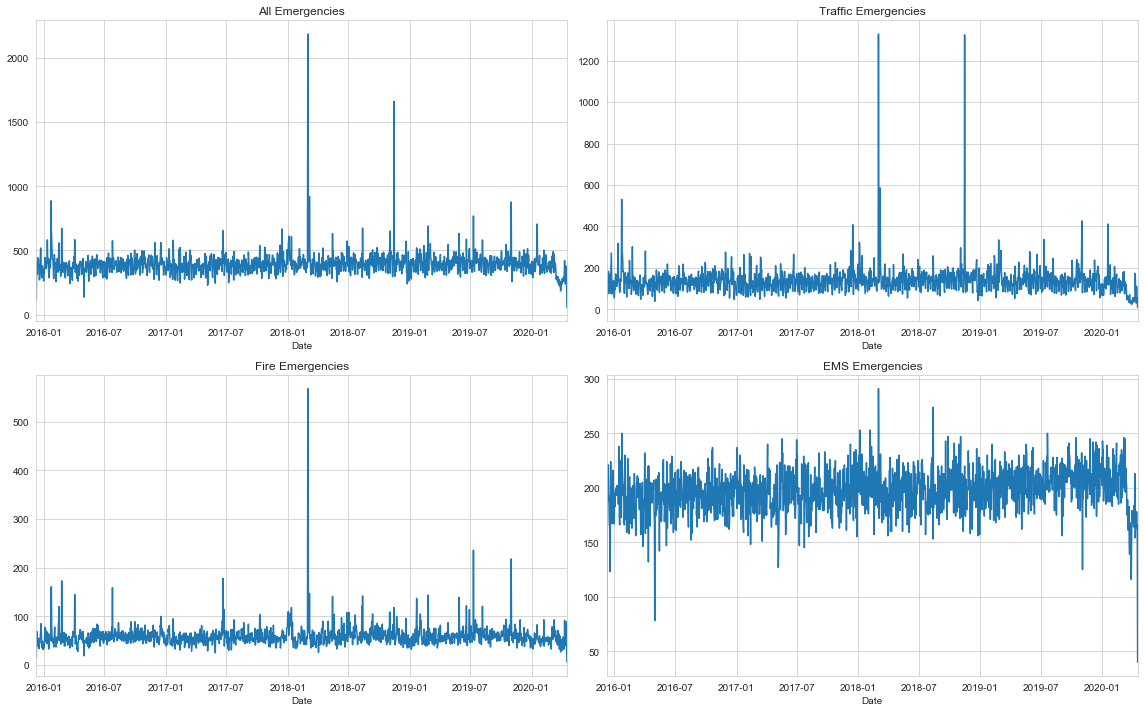

In [30]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)

#All Emergencies
byDate.max(axis=1).plot()
plt.title('All Emergencies')
plt.tight_layout()

plt.subplot(2,2,2)

#Traffic Emergencies
traffic = df[df['Reason'] == 'Traffic'].groupby('Date').count()
traffic.max(axis=1).plot()
plt.title('Traffic Emergencies')
plt.tight_layout()

plt.subplot(2,2,3)

#Fire Emergencies
fire = df[df['Reason'] == 'Fire'].groupby('Date').count()
fire.max(axis=1).plot()
plt.title('Fire Emergencies')
plt.tight_layout()

plt.subplot(2,2,4)

#EMS Emergencies
ems = df[df['Reason'] == 'EMS'].groupby('Date').count()
ems.max(axis=1).plot()
plt.title('EMS Emergencies')
plt.tight_layout()

### Heat and Cluster Map for Distribution of Emergencies between Day of Week and Hour

#### Restructure the Data Frame

In [31]:
DayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
DayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1861,1528,1362,1237,1237,1551,2554,3976,4812,5007,...,6049,6667,6734,6795,5374,4780,4124,3677,3234,2703
Mon,1775,1469,1290,1203,1269,1741,2571,4270,5314,5470,...,5365,5866,6028,6122,5174,4247,3576,3065,2506,1957
Sat,2305,1950,1802,1507,1367,1485,1782,2381,3291,4109,...,5134,4908,4922,4938,4740,4512,3924,3690,3044,2807
Sun,2307,2042,1842,1522,1394,1393,1649,2280,2861,3540,...,4469,4232,4293,4273,4163,3944,3532,2965,2465,2194
Thu,1624,1318,1340,1167,1199,1678,2692,4286,5115,5119,...,5752,6145,6044,6632,5237,4439,3871,3303,2688,2226


#### Heat Map

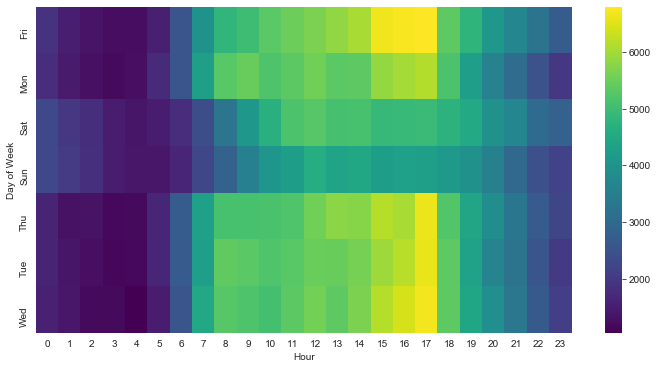

In [32]:
plt.figure(figsize=(12,6))
sns.heatmap(DayHour, cmap='viridis')

### Analysis: From the Heat Map, we can see that most of the Emergencies occur during Daytime with the most significant between 15-17 Hours.

#### Cluster Map

<Figure size 864x432 with 0 Axes>

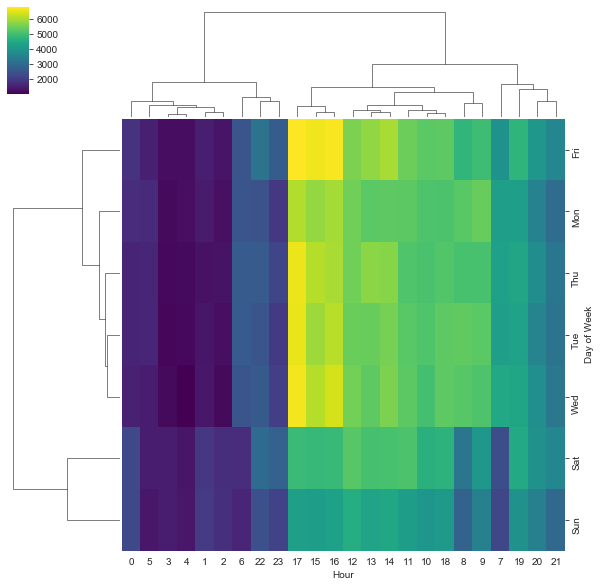

In [33]:
plt.figure(figsize=(12,6))
sns.clustermap(DayHour, cmap='viridis')

### Analysis: From the Cluster Map, it is visible that there are more Emergencies on Weekdays as compared o Weekends.

### Heat and Cluster Map for Distribution of Emergencies between Day of Week and Month

#### Restructure the Data Frame

In [34]:
DayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
DayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,9309,8255,10941,7479,7214,7647,7103,7336,7694,6934,8379,9305
Mon,8896,8747,8060,7843,6746,6740,7929,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7027,5796,6839,6395,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6417,5410,5673,6567,5275,5956,6316,5196,7165
Thu,9055,7997,8849,6902,7524,7850,6964,7508,6954,7482,8358,8151


#### Heat Map

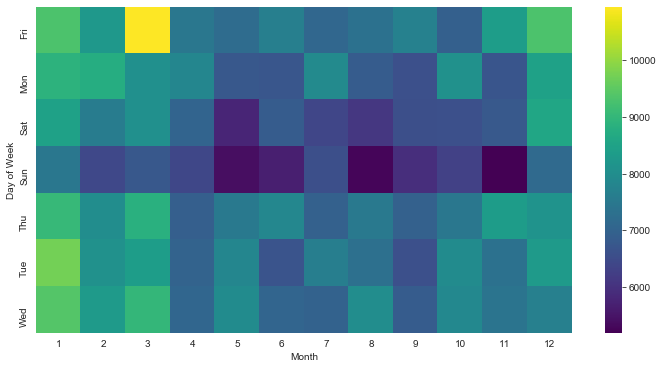

In [35]:
plt.figure(figsize=(12,6))
sns.heatmap(DayMonth, cmap='viridis')

### Analysis: This Heat Map does not provide much information except for the fact that the Friday of March has seen the highest number of Emergencies.

#### Cluster Map

<Figure size 864x432 with 0 Axes>

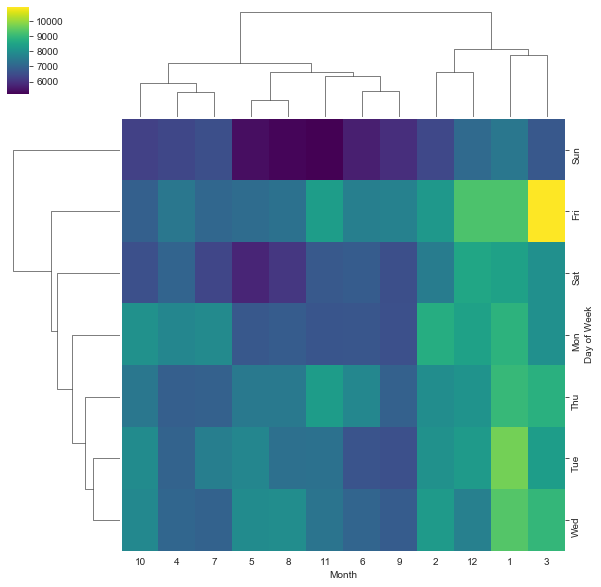

In [36]:
plt.figure(figsize=(12,6))
sns.clustermap(DayMonth, cmap='viridis')

### Analysis: The Cluster Map shows us that throughout the Year, Weekends (Friday, Saturday and Sunday) has had the least number of emergencies and the end and start of a year (December, January, February, March) has most cases as compared to other months of the Year.

## Final Conclusion: We visualized the areas and towns of Maryland which has the Maximum Number of Emergencies. Thus we can consider those areas as the Major Areas of Maryland as the Number of Emergencies is directly dependant on the Population of an Area. Secondly, we anaylyzed that Vehicle Accidents are most frequent in Maryland, therefore the traffic rules need to be more stringent. Also, Medical Emergency is the most prominent type of Emergency, therefore Maryland needs to look after its citizen's healthcare more effctively. We also successfully concluded that almost all the Employees in Maryland have holidays on Saturday and Sunday as the Traffic Emergencies are the least on these 2 days.